# I. Setup pour l'analyse

In [23]:
import utils
import pandas as pd
import numpy as np

## II. Setup data

In [3]:
## CHARGEMENT DATA DEPUIS BDD
# création connexion
engine = utils.get_engine()

# Spécifier le nom de la table que vous souhaitez exporter
table_name = '"dataco2cv"'

# Exécuter une requête SQL pour sélectionner les données de la table
query = f"SELECT * FROM {table_name}"

# Lire les résultats de la requête dans un DataFrame pandas
data = pd.read_sql_query(query, engine)

Récupération table depuis la BDD ...


In [4]:
data.head()

,osebuildingid,buildingtype,primarypropertytype,propertyname,neighborhood,latitude,longitude,yearbuilt,numberofbuildings,numberoffloors,...,single family home_gfa,social/meeting hall_gfa,strip mall_gfa,supermarket/grocery store_gfa,swimming pool_gfa,urgent care/clinic/other outpatient_gfa,vocational school_gfa,wholesale club/supercenter_gfa,worship facility_gfa,nombre_utilisation_differente
0,1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,...,0,0,0,0,0,0,0,0,0,1
1,2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,...,0,0,0,0,0,0,0,0,0,3
2,3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,...,0,0,0,0,0,0,0,0,0,1
3,5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,...,0,0,0,0,0,0,0,0,0,1
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,...,0,0,0,0,0,0,0,0,0,3


In [7]:
# drop valeur négative
data = data[data['osebuildingid'] != 49784]

In [21]:
data.columns.tolist()

['osebuildingid',
 'buildingtype',
 'primarypropertytype',
 'propertyname',
 'neighborhood',
 'latitude',
 'longitude',
 'yearbuilt',
 'numberofbuildings',
 'numberoffloors',
 'propertygfatotal',
 'propertygfaparking',
 'propertygfabuilding_s',
 'listofallpropertyusetypes',
 'largestpropertyusetype',
 'largestpropertyusetypegfa',
 'secondlargestpropertyuse',
 'secondlargestpropertyusetype',
 'thirdlargestpropertyusetype',
 'thirdlargestpropertyusetypegfa',
 'energystarscore',
 'siteeui_kbtu_sf',
 'siteeuiwn_kbtu_sf',
 'sourceeui_kbtu_sf',
 'sourceeuiwn_kbtu_sf',
 'siteenergyuse_kbtu',
 'siteenergyusewn_kbtu',
 'steamuse_kbtu',
 'electricity_kbtu',
 'naturalgas_kbtu',
 'totalghgemissions',
 'ghgemissionsintensity',
 'yearsenergystarcertified',
 'geopoint',
 'Electricite_bool',
 'Gaz_bool',
 'Vapeur_bool',
 'certif2016',
 'propertygfatotal_log',
 'propertygfaparking_log',
 'propertygfabuilding_s_log',
 'largestpropertyusetypegfa_log',
 'secondlargestpropertyuse_log',
 'thirdlargestproper

In [6]:
# Listes de features pour réutilisation
listOfAllUses = ['adult education', 'automobile dealership', 'bank branch', 'bar/nightclub', 'college/university', 
                 'convenience store without gas station', 'courthouse', 'data center', 'distribution center', 
                 'enclosed mall', 'energy/power station', 'fast food restaurant', 'financial office', 'fire station', 
                 'fitness center/health club/gym', 'food sales', 'food service', 'hospital', 'hotel', 'k-12 school', 'laboratory', 
                 'library', 'lifestyle center', 'manufacturing/industrial plant', 'medical office', 'movie theater', 'multifamily housing', 
                 'museum', 'non-refrigerated warehouse', 'office', 'other', 'other - education', 'other - entertainment/public assembly', 
                 'other - lodging/residential', 'other - mall', 'other - public services', 'other - recreation', 'other - restaurant/bar', 
                 'other - services', 'other - technology/science', 'other - utility', 'other/specialty hospital', 
                 'outpatient rehabilitation/physical therapy', 'parking', 'performing arts', 'personal services', 'police station', 
                 'pre-school/daycare', 'prison/incarceration', 'refrigerated warehouse', 'repair services', 'residence hall/dormitory', 
                 'residential care facility', 'restaurant', 'retail store', 'self-storage facility', 'senior care community', 
                 'single family home', 'social/meeting hall', 'strip mall', 'supermarket/grocery store', 'swimming pool', 
                 'urgent care/clinic/other outpatient', 'vocational school', 'wholesale club/supercenter', 'worship facility']

listOfAllUsesGfa = ['adult education_gfa', 'automobile dealership_gfa', 'bank branch_gfa', 'bar/nightclub_gfa', 
                    'college/university_gfa', 'convenience store without gas station_gfa', 'courthouse_gfa', 'data center_gfa', 
                    'distribution center_gfa', 'enclosed mall_gfa', 'energy/power station_gfa', 'fast food restaurant_gfa', 
                    'financial office_gfa', 'fire station_gfa', 'fitness center/health club/gym_gfa', 'food sales_gfa', 
                    'food service_gfa', 'hospital_gfa', 'hotel_gfa', 'k-12 school_gfa', 'laboratory_gfa', 'library_gfa', 
                    'lifestyle center_gfa', 'manufacturing/industrial plant_gfa', 'medical office_gfa', 'movie theater_gfa', 
                    'multifamily housing_gfa', 'museum_gfa', 'non-refrigerated warehouse_gfa', 'office_gfa', 'other_gfa', 
                    'other - education_gfa', 'other - entertainment/public assembly_gfa', 'other - lodging/residential_gfa', 
                    'other - mall_gfa', 'other - public services_gfa', 'other - recreation_gfa', 'other - restaurant/bar_gfa', 
                    'other - services_gfa', 'other - technology/science_gfa', 'other - utility_gfa', 'other/specialty hospital_gfa', 
                    'outpatient rehabilitation/physical therapy_gfa', 'parking_gfa', 'performing arts_gfa', 'personal services_gfa', 
                    'police station_gfa', 'pre-school/daycare_gfa', 'prison/incarceration_gfa', 'refrigerated warehouse_gfa', 
                    'repair services_gfa', 'residence hall/dormitory_gfa', 'residential care facility_gfa', 'restaurant_gfa', 
                    'retail store_gfa', 'self-storage facility_gfa', 'senior care community_gfa', 'single family home_gfa', 
                    'social/meeting hall_gfa', 'strip mall_gfa', 'supermarket/grocery store_gfa', 'swimming pool_gfa', 
                    'urgent care/clinic/other outpatient_gfa', 'vocational school_gfa', 'wholesale club/supercenter_gfa', 'worship facility_gfa']

Realisation du dataset avec seulement les features + 1 des targets

In [30]:
#creation de variables en log pour test
data['siteenergyuse_kbtu_log'] = np.log(data['siteenergyuse_kbtu'])
data['totalghgemissions_log'] = np.log(data['totalghgemissions'])

In [25]:
dataset = data[['primarypropertytype',"numberoffloors","propertygfabuilding_s","largestpropertyusetype", "Gaz_bool", "Vapeur_bool", 'siteenergyuse_kbtu_log'] + listOfAllUses ]
# y = data[['ghgemissionsintensity_log', 'siteeuiwn_kbtu_sf_log']]

In [26]:
dataset.shape

(3190, 73)

# III. Pycaret

In [14]:
from pycaret.regression import *

In [28]:
s = setup(dataset, target = 'siteenergyuse_kbtu_log')

,Description,Value
0,Session id,5356
1,Target,siteenergyuse_kbtu_log
2,Target type,Regression
3,Original data shape,"(3190, 73)"
4,Transformed data shape,"(3190, 95)"
5,Transformed train set shape,"(2233, 95)"
6,Transformed test set shape,"(957, 95)"
7,Numeric features,68
8,Categorical features,2
9,Preprocess,True


In [29]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:02:20
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3745,0.2732,0.5209,0.7879,0.0334,0.0257,0.3450
lightgbm,Light Gradient Boosting Machine,0.3830,0.2847,0.5323,0.7776,0.0341,0.0263,0.2110
rf,Random Forest Regressor,0.3972,0.3109,0.5562,0.7573,0.0357,0.0272,0.7020
et,Extra Trees Regressor,0.4137,0.3257,0.5702,0.7441,0.0368,0.0285,0.7200
ada,AdaBoost Regressor,0.4537,0.3608,0.5988,0.7200,0.0382,0.0311,0.3240
br,Bayesian Ridge,0.4943,0.4427,0.6608,0.6600,0.0415,0.0338,0.2690
ridge,Ridge Regression,0.4957,0.4451,0.6624,0.6583,0.0416,0.0339,0.1600
lr,Linear Regression,0.4987,0.4521,0.6675,0.6531,0.0419,0.0341,0.4810
omp,Orthogonal Matching Pursuit,0.5206,0.4918,0.6982,0.6198,0.0438,0.0356,0.1890
dt,Decision Tree Regressor,0.5152,0.5328,0.7284,0.5847,0.0468,0.0353,0.1410


In [41]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3445,0.2244,0.4737,0.8276,0.0303,0.0236
1,0.3382,0.2314,0.4810,0.7719,0.0313,0.0235
2,0.4002,0.3247,0.5698,0.7617,0.0375,0.0280
3,0.3287,0.1985,0.4455,0.8258,0.0285,0.0225
4,0.3946,0.3338,0.5777,0.7963,0.0361,0.0264
5,0.3719,0.2778,0.5271,0.7838,0.0336,0.0254
6,0.4194,0.3268,0.5717,0.7521,0.0367,0.0288
7,0.3737,0.2534,0.5034,0.7872,0.0328,0.0259
8,0.3893,0.2934,0.5417,0.8180,0.0346,0.0266


In [42]:
gbr.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(random_state=5356)>

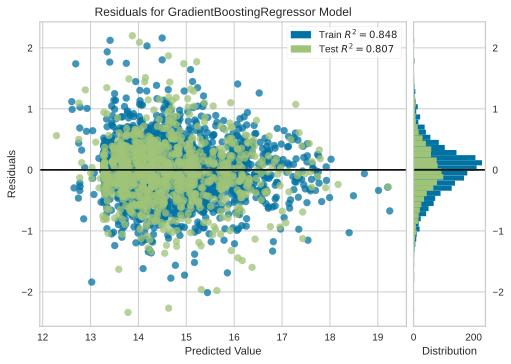

In [43]:
plot_model(gbr)

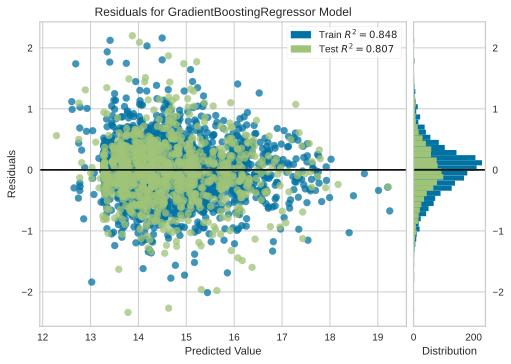

In [45]:
plot_model(best)

In [34]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
print(best)

GradientBoostingRegressor(random_state=5356)


In [37]:
best.get_params
# comme s'il n'y avait pas de paramètres? bizarre

<bound method BaseEstimator.get_params of GradientBoostingRegressor(random_state=5356)>

In [20]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3556,0.2511,0.5011,0.4327,0.1115,0.1037


,primarypropertytype,numberoffloors,propertygfabuilding_s,largestpropertyusetype,Gaz_bool,Vapeur_bool,adult education,automobile dealership,bank branch,bar/nightclub,...,social/meeting hall,strip mall,supermarket/grocery store,swimming pool,urgent care/clinic/other outpatient,vocational school,wholesale club/supercenter,worship facility,siteeuiwn_kbtu_sf_log,prediction_label
1266,Mid-Rise Multifamily,5,41510,multifamily housing,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,3.478158,3.750333
2219,Mid-Rise Multifamily,9,53820,multifamily housing,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,4.053523,3.830911
1518,Small- and Mid-Sized Office,4,29722,office,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,3.981549,3.922922
2830,Low-Rise Multifamily,4,63317,multifamily housing,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,3.367296,3.402828
1165,Mid-Rise Multifamily,5,32870,multifamily housing,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,3.728100,3.371816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Small- and Mid-Sized Office,4,54175,office,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,4.527209,4.329904
1116,Mid-Rise Multifamily,7,262316,multifamily housing,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,3.666122,3.730720
2070,Low-Rise Multifamily,4,22553,multifamily housing,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,3.632309,3.369756
3150,Low-Rise Multifamily,4,44650,multifamily housing,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,3.374169,3.371816
